# Data ingestion & inspection

In this chapter, we will introduce pandas DataFrames. You will use pandas to import and inspect a variety of datasets, ranging from population data obtained from the World Bank to monthly stock data obtained via Yahoo Finance. You will also practice building DataFrames from scratch and become familiar with the intrinsic data visualization capabilities of pandas.

In [1]:
import utils

/Users/ca68vj/miniconda3/envs/machine-learning/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Intro to pandas DataFrames

### Inspecting Data

We can use the DataFrame methods `.head()` and `.tail()` to view the first few and last few rows of a DataFrame. We have imported pandas as ```pd``` and loaded population data from 1960 to 2018 as a DataFrame `urban_population`. This dataset was obtained from the [World Bank](https://databank.worldbank.org/reports.aspx?source=2&type=metadata&series=SP.URB.TOTL.IN.ZS#).

Let's use `urban_population.head()` and `urban_population.tail()` to verify that the first and last rows match a file on disk. In later exercises, we will see how to extract values from DataFrames with indexing.

In [2]:
# First 5 rows
utils.urban_population.head()

,Year,Country Name,Country Code,Urban population (% of total),Total Population
0,1960,Afghanistan,AFG,8.401,8996973.0
1,1960,Albania,ALB,30.705,1608800.0
2,1960,Algeria,DZA,30.510,11057863.0
3,1960,American Samoa,ASM,66.211,20123.0
4,1960,Andorra,AND,58.450,13411.0


In [3]:
# Last 5 rows
utils.urban_population.tail()

,Year,Country Name,Country Code,Urban population (% of total),Total Population
15571,2018,Sub-Saharan Africa,SSF,40.176823,1.078307e+09
15572,2018,Sub-Saharan Africa (excluding high income),SSA,40.175341,1.078210e+09
15573,2018,Sub-Saharan Africa (IDA & IBRD countries),TSS,40.176823,1.078307e+09
15574,2018,Upper middle income,UMC,66.233368,2.655636e+09
15575,2018,World,WLD,55.270579,7.594270e+09


### DataFrame data types

Pandas is aware of the data types in the columns of your DataFrame. It is also aware of null and `NaN` ('Not-a-Number') types which often indicate missing data. 

We can use `urban_population.info()` to determine information about the total count of non-null entries and infer the total count of null entries, which likely indicates missing data.

In [4]:
utils.urban_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 5 columns):
Year                             15576 non-null int64
Country Name                     15576 non-null object
Country Code                     15576 non-null object
Urban population (% of total)    15332 non-null float64
Total Population                 15409 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 608.6+ KB


### NumPy and pandas working together

Pandas depends upon and interoperates with NumPy, the Python library for fast numeric array computations. For example, you can use the DataFrame attribute `.values` to represent a DataFrame df as a NumPy array. You can also pass pandas data structures to NumPy methods. 

In this example, we have loaded world population data every 10 years since 1960 into the DataFrame `world_population`. This dataset was derived from the one used in the previous exercise.

In [5]:
# Import numpy
import numpy as np

In [6]:
# Create array of DataFrame values: np_vals
np_vals = utils.world_population.values

In [7]:
# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

In [8]:
# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(utils.world_population)

In [9]:
# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'utils.world_population', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
utils.world_population has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

## Building DataFrames from scratch

### Zip lists to build a DataFrame

In this example, we're going to make a pandas DataFrame of the top three countries to win gold medals since 1896 by first building a dictionary. `list_keys` contains the column names 'Country' and 'Total'. `list_values` contains the full names of each country and the number of gold medals awarded. The values have been taken from [Wikipedia](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table).

In [10]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

We will use these lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the `list()`, `zip()`, `dict()` and `pd.DataFrame()` functions. Pandas has been imported as `pd`.

In [11]:
import pandas as pd

Note: The [zip()](https://docs.python.org/3/library/functions.html#zip) function in Python 3 and above returns a special zip object, which is essentially a generator. To convert this `zip` object into a list, we'll need to use `list()`.

In [12]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]


In [13]:
# Build a dictionary with the zipped list: data
data = dict(zipped)
print(data)

{'Country': ['United States', 'Soviet Union', 'United Kingdom'], 'Total': [1118, 473, 273]}


In [14]:
# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


### Labeling data

You can use the DataFrame attribute `df.columns` to view and assign new string labels to columns in a pandas DataFrame.

In this example, we have defined a DataFrame `artists` containing top Billboard hits from the 1980s (from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_1980s#1980)). Each row has the year, artist, song name and the number of weeks at the top. However, this DataFrame has the column labels a, b, c, d. Your job is to use the df.columns attribute to re-assign descriptive column labels.

In [15]:
utils.artists

,a,b,c,d
0,1980,Blondie,Call Me,6
1,1981,Christopher Cross,Arthur's Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


In [16]:
# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

In [17]:
# Assign the list of labels to the columns attribute: df.columns
utils.artists.columns = list_labels
utils.artists

,year,artist,song,chart weeks
0,1980,Blondie,Call Me,6
1,1981,Christopher Cross,Arthur's Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


### Building DataFrames with broadcasting

We can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames. In this example, we're going to create a DataFrame of cities in Pennsylvania that contains the city name in one column and the state name in the second. We have imported the names of 15 cities as the list `cities`

In [18]:
utils.cities

['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']

In [19]:
# Make a string with the value 'PA': state
state = 'PA'

In [20]:
# Construct a dictionary: data
data = {'state': state, 'city': utils.cities}

In [21]:
# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


## Importing & exporting data

### Reading a flat file

In previous examples, the data was already preloaded using the pandas function `read_csv()`. Now, let's have a look how we can use it to read the World Bank population data we saw earlier into a DataFrame. The file is available in the variable `data/urban_population.csv`.

In [22]:
# Just read the file
urban_population = pd.read_csv('data/urban_population.csv')

# Print the DataFrame
urban_population

,Year,Time Code,Country Name,Country Code,Urban population (% of total),Total Population
0,1960,YR1960,Afghanistan,AFG,8.401,8996973
1,1960,YR1960,Albania,ALB,30.705,1608800
2,1960,YR1960,Algeria,DZA,30.51,11057863
3,1960,YR1960,American Samoa,ASM,66.211,20123
4,1960,YR1960,Andorra,AND,58.45,13411
...,...,...,...,...,...,...
15571,2018,YR2018,Sub-Saharan Africa,SSF,40.1768233729515,1078306520
15572,2018,YR2018,Sub-Saharan Africa (excluding high income),SSA,40.175341337803,1078209758
15573,2018,YR2018,Sub-Saharan Africa (IDA & IBRD countries),TSS,40.1768233729515,1078306520
15574,2018,YR2018,Upper middle income,UMC,66.2333682980853,2655635719


In [23]:
# Show DataFrame info
urban_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 6 columns):
Year                             15576 non-null int64
Time Code                        15576 non-null object
Country Name                     15576 non-null object
Country Code                     15576 non-null object
Urban population (% of total)    15576 non-null object
Total Population                 15576 non-null object
dtypes: int64(1), object(5)
memory usage: 730.2+ KB


Somethings seems off. Two of the columns should have dtype of `float64` and some missing values. When exporting the dataset from the WorldBank the default placeholder for missing values is `..`.  The `read_csv()`  function allows us to specify extra `NaN` characters. 

In [24]:
# Just read the file
urban_population = pd.read_csv('data/urban_population.csv', na_values=['..'])

# Show DataFrame info
urban_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 6 columns):
Year                             15576 non-null int64
Time Code                        15576 non-null object
Country Name                     15576 non-null object
Country Code                     15576 non-null object
Urban population (% of total)    15332 non-null float64
Total Population                 15409 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 730.2+ KB


Also we have a column too much. We don't need the `Time Code` column. We can drop it after we've read it using the `df.drop()` function or we can decide not to read it by using the `usecols` parameter when reading the data using the `read_csv()` function

In [25]:
cols = ['Country Name', 'Country Code', 'Year', 'Total Population', 'Urban population (% of total)']
urban_population = pd.read_csv('data/urban_population.csv', usecols=cols, na_values=['..'])

urban_population.head()

,Year,Country Name,Country Code,Urban population (% of total),Total Population
0,1960,Afghanistan,AFG,8.401,8996973.0
1,1960,Albania,ALB,30.705,1608800.0
2,1960,Algeria,DZA,30.510,11057863.0
3,1960,American Samoa,ASM,66.211,20123.0
4,1960,Andorra,AND,58.450,13411.0


### Delimiters, headers, and extensions

Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that we encounter far too often.

In this example, we have monthly stock data for four companies downloaded from [Yahoo Finance](https://finance.yahoo.com/?guccounter=1). The data is stored as one row for each company and each column is the end-of-month closing price. The file name is in the variable `utils.file_messy`.

In addition, this file has three aspects that may cause trouble for lesser tools: multiple header lines, comment records (rows) interleaved throughout the data rows, and space delimiters instead of commas.

Let's use pandas to read the data from this problematic `file_messy` using non-default input options with `read_csv()` so as to tidy up the mess at read time. Then, write the cleaned up data to a CSV file with the variable `file_clean`, as you might do in a real data workflow.

You can learn about the option input parameters needed by using `help()` on the pandas function `pd.read_csv()`.

In [26]:
help(pd.read_csv)
# ?pd.read_csv
# ??pd.read_csv

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Dat

In [27]:
# Read the raw file as-is: df1
df1 = pd.read_csv(utils.file_messy)

# Print the output of df1.head()
df1.head()

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN


Contents of `file_messy`

```
The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful, are they?
probably should just throw this line away too, but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
# So that line you just read has all the column headers labels
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96
MSFT 45.51 43.08 42.13 43.47 47.53 45.96 45.61 45.51 43.56 48.70 53.88 55.40
# That MSFT is MicroSoft
GOOGLE 512.42 537.99 559.72 540.50 535.24 532.92 590.09 636.84 617.93 663.59 735.39 755.35
APPLE 110.64 125.43 125.97 127.29 128.76 127.81 125.34 113.39 112.80 113.36 118.16 111.73
# Maybe we should have bought some Apple stock in 2008?
```

In [28]:
# Read in the file with the correct parameters: df2
df2 = pd.read_csv(utils.file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
df2.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [29]:
# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv('data/file_clean.csv', index=False)

## Plotting with pandas

### Plotting series using pandas

Data visualization is often a very effective first step in gaining a rough understanding of a data set to be analyzed. Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. We will now explore some of the basic plotting mechanics with pandas as well as related matplotlib options. We will use the DataFrame method `df.plot()` to visualize the data, and then explore the optional matplotlib input parameters that this `.plot()` method accepts.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

The pandas `.plot()` method makes calls to matplotlib to construct the plots. This means that we can use the skills we've learned in the previous visualization lesson to customize the plot. In this example, we'll add a custom title and axis labels to the figure.

Before plotting, let's inspect the DataFrame in using df.head(). Also, let's use type(df) and note that it is a single column DataFrame.

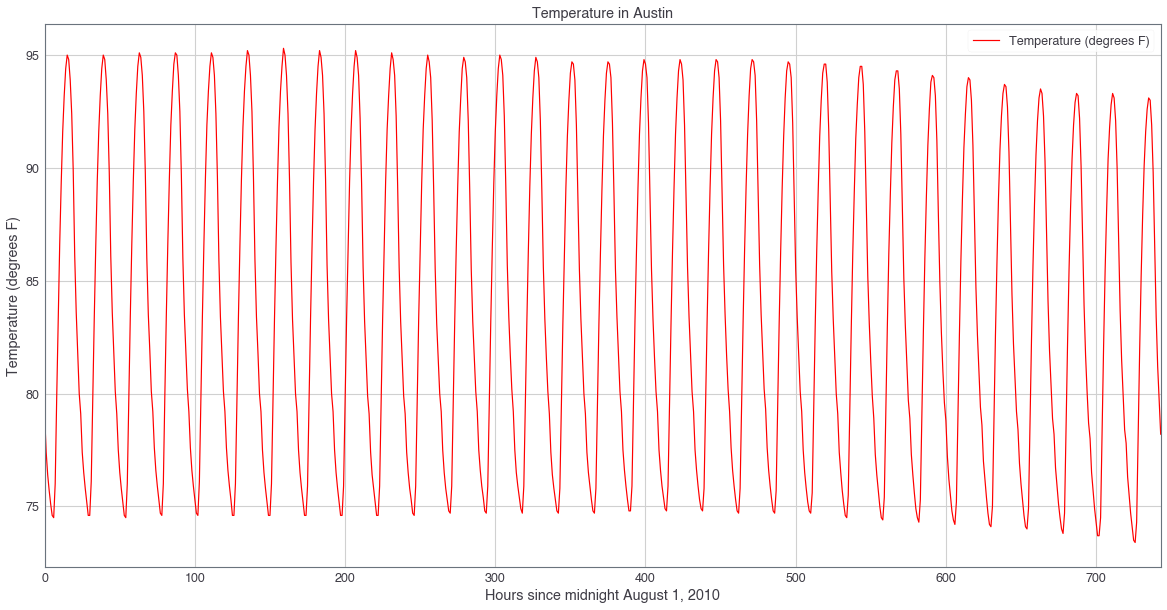

In [31]:
# Create a plot with color='red'
utils.august_weather[['Temperature (degrees F)']].plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

### Plotting DataFrames

Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. By default, calling `df.plot()` will cause pandas to over-plot all column data, with each column as a single line. In this example, we have pre-loaded three columns of data from a weather data set - temperature, dew point, and pressure - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit.

Let's plot all columns as a multi-line plot, to see the nature of vertical scaling problem. Then, we'll use a list of column names passed into the DataFrame `df[column_list]` to limit plotting to just one column, and then just 2 columns of data.

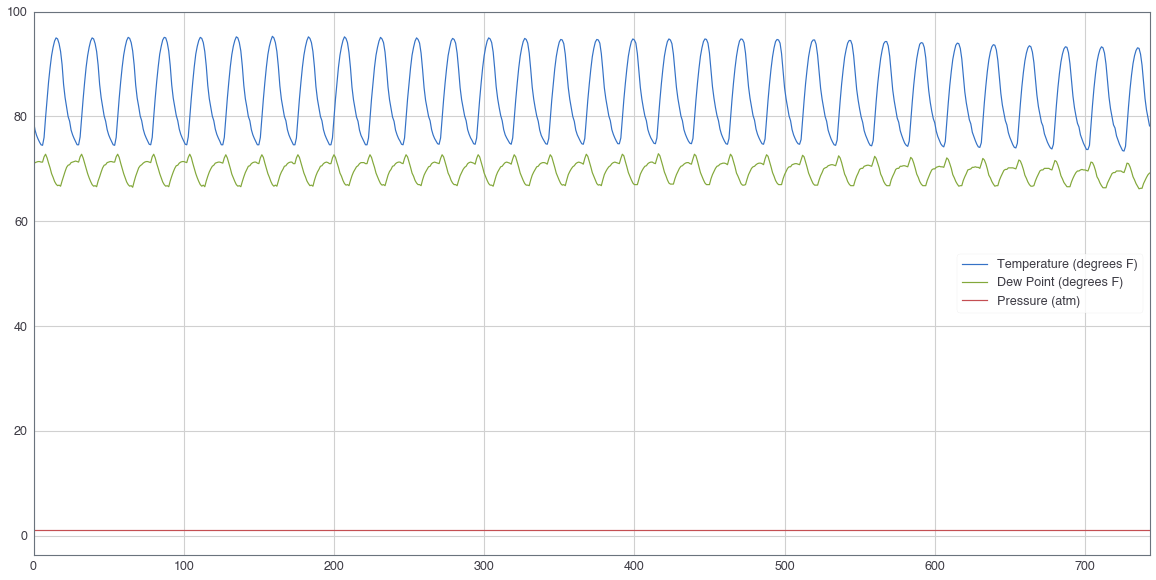

In [32]:
utils.august_weather.plot()
plt.show()

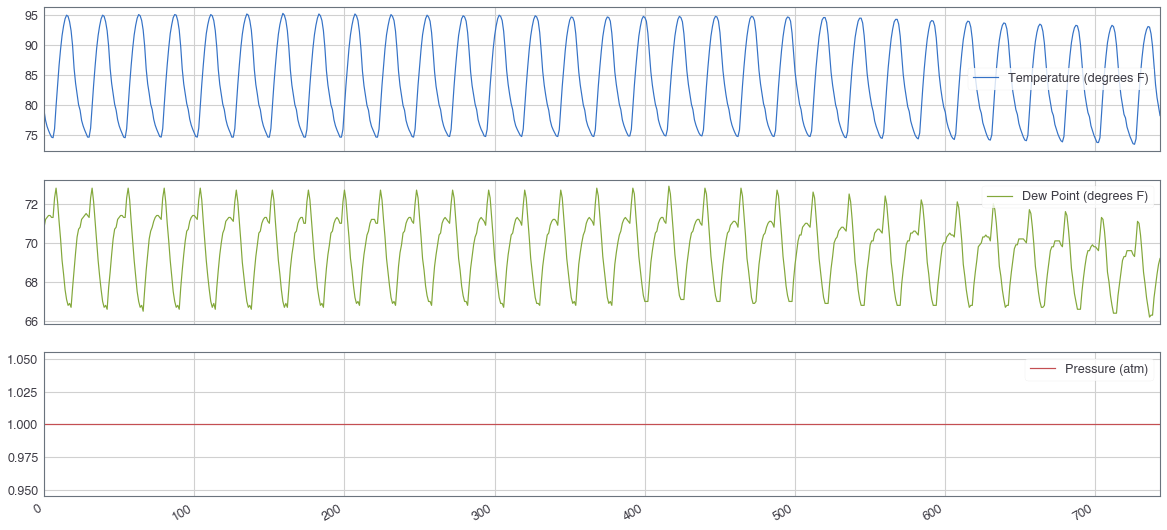

In [33]:
# Plot all columns as subplots
utils.august_weather.plot(subplots=True)
plt.show()

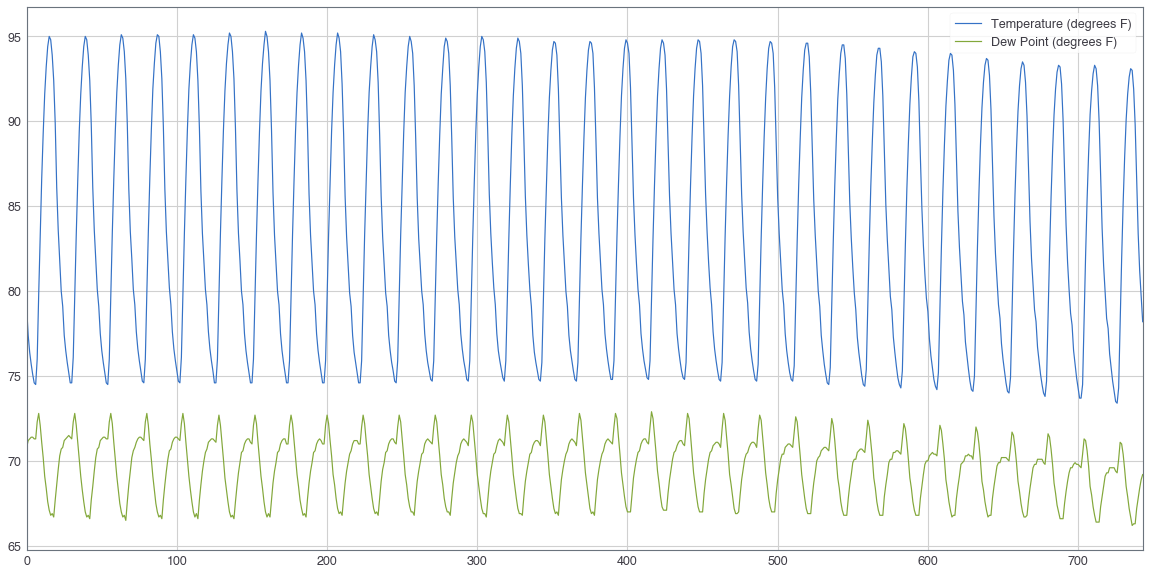

In [34]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list = ['Temperature (degrees F)','Dew Point (degrees F)']
utils.august_weather[column_list].plot()
plt.show()

# Extracting and transforming data

In this chapter, we will learn how to index, slice, filter, and transform DataFrames using a variety of datasets

## Index DataFrames

### Square Brackets

You can index and select Pandas DataFrames in many different ways. The simplest, but not the most powerful way, is to use square brackets.

In [35]:
# Print out winner column as Pandas Series
utils.election['winner']

county
Adams           Romney
Allegheny        Obama
Armstrong       Romney
Beaver          Romney
Bedford         Romney
                 ...  
Washington      Romney
Wayne           Romney
Westmoreland    Romney
Wyoming         Romney
York            Romney
Name: winner, Length: 67, dtype: object

In [36]:
# Print out winner column as Pandas DataFrame
utils.election[['winner']]

,winner
county,
Adams,Romney
Allegheny,Obama
Armstrong,Romney
Beaver,Romney
Bedford,Romney
...,...
Washington,Romney
Wayne,Romney
Westmoreland,Romney


The single bracket version gives a Pandas Series, the double bracket version gives a Pandas DataFrame.

In [37]:
# Print out DataFrame with winner and turnout columns
utils.election[['winner', 'turnout']]

,winner,turnout
county,,
Adams,Romney,68.632677
Allegheny,Obama,66.497575
Armstrong,Romney,67.198140
Beaver,Romney,69.483401
Bedford,Romney,66.619031
...,...,...
Washington,Romney,63.287689
Wayne,Romney,64.358290
Westmoreland,Romney,70.884347


Square brackets can do more than just selecting columns. We can also use them to get rows, or observations, from a DataFrame. The following call selects the first five rows from the election DataFrame:

```
utils.election[0:5]
```

The result is another DataFrame containing only the rows we specified.

In [38]:
# Print out first 3 observations
utils.election[:3]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293


In [39]:
# Print out fourth, fifth and sixth observation
utils.election[3:6]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118
Berks,PA,163253,48.939376,49.528646,Romney,250356,65.208343,0.589269


### Positional and labeled indexing (loc and iloc)

With [loc](http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing) and [iloc](http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing) you can do practically any data selection operation on DataFrames you can think of. `loc` is label-based, which means that you have to specify rows and columns based on their row and column labels. `iloc` is integer index based, so you have to specify rows and columns by their integer index like we did in the previous example.

In [40]:
# Print out observation for Indiana
utils.election.loc['Indiana']

state           PA
total        36180
Obama      39.8093
Romney       58.56
winner      Romney
voters       57378
turnout    63.0555
margin     18.7507
Name: Indiana, dtype: object

In [41]:
# Same but using iloc
utils.election.iloc[31]

state           PA
total        36180
Obama      39.8093
Romney       58.56
winner      Romney
voters       57378
turnout    63.0555
margin     18.7507
Name: Indiana, dtype: object

In [42]:
# Print out observations for Indiana and Northampton
utils.election.loc[['Indiana', 'Northampton']]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Indiana,PA,36180,39.809287,58.559978,Romney,57378,63.055527,18.750691
Northampton,PA,125883,51.646370,47.061160,Obama,209414,60.112027,4.585210


In [43]:
# Same but using iloc
utils.election.iloc[[31, 47]]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Indiana,PA,36180,39.809287,58.559978,Romney,57378,63.055527,18.750691
Northampton,PA,125883,51.646370,47.061160,Obama,209414,60.112027,4.585210


`loc` and `iloc` also allow us to select both rows and columns from a DataFrame.

In [44]:
# Print out winner value of Indiana
print(utils.election.loc['Indiana', 'winner'])

Romney


In [45]:
# Print sub-DataFrame
utils.election.loc[['Indiana', 'Northampton'], ['winner', 'turnout']]

,winner,turnout
county,,
Indiana,Romney,63.055527
Northampton,Obama,60.112027


It's also possible to select only columns with `loc` and `iloc. In both cases, you simply put a slice going from beginning to end in front of the comma:

```
cars.loc[:, 'country']
cars.iloc[:, 1]

cars.loc[:, ['country','drives_right']]
cars.iloc[:, [1, 2]]
```

In [46]:
# Print out winner column as Series
utils.election.loc[:, 'winner']

county
Adams           Romney
Allegheny        Obama
Armstrong       Romney
Beaver          Romney
Bedford         Romney
                 ...  
Washington      Romney
Wayne           Romney
Westmoreland    Romney
Wyoming         Romney
York            Romney
Name: winner, Length: 67, dtype: object

In [47]:
# Print out winner column as DataFrame
utils.election.loc[:, ['winner']]

,winner
county,
Adams,Romney
Allegheny,Obama
Armstrong,Romney
Beaver,Romney
Bedford,Romney
...,...
Washington,Romney
Wayne,Romney
Westmoreland,Romney


In [48]:
# Print out winner and turnout as DataFrame
utils.election.loc[:, ['winner', 'turnout']]

,winner,turnout
county,,
Adams,Romney,68.632677
Allegheny,Obama,66.497575
Armstrong,Romney,67.198140
Beaver,Romney,69.483401
Bedford,Romney,66.619031
...,...,...
Washington,Romney,63.287689
Wayne,Romney,64.358290
Westmoreland,Romney,70.884347


### Indexing and column rearrangement

There are circumstances in which it's useful to modify the order of DataFrame columns. We do that now by extracting just two columns from the Pennsylvania election results DataFrame.

In [49]:
# Create a separate dataframe with the columns ['winner', 'total', 'voters']
utils.election[['winner', 'total', 'voters']].head()

,winner,total,voters
county,,,
Adams,Romney,41973,61156
Allegheny,Obama,614671,924351
Armstrong,Romney,28322,42147
Beaver,Romney,80015,115157
Bedford,Romney,21444,32189


## Slicing DataFrames

### Slicing rows

The Pennsylvania US election results data set that we have been using so far is ordered by county name. This means that county names can be sliced alphabetically. In this example, we're going to perform slicing on the county names of the election DataFrame.

In [50]:
# Slice the row labels 'Perry' to 'Potter': p_counties
utils.election.loc['Perry':'Potter']

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681


In [51]:
# Slice the row labels 'Potter' to 'Perry' in reverse order
utils.election.loc['Potter':'Perry':-1]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272


### Slicing columns

Similar to row slicing, columns can be sliced by value using `.loc[]`.

In [52]:
# Slice the columns from 'Obama' to 'winner'
utils.election.loc[:, 'Obama':'winner'].head()

,Obama,Romney,winner
county,,,
Adams,35.482334,63.112001,Romney
Allegheny,56.640219,42.185820,Obama
Armstrong,30.696985,67.901278,Romney
Beaver,46.032619,52.637630,Romney
Bedford,22.057452,76.986570,Romney


In [53]:
# Slice the columns from the starting column to 'Obama'
utils.election.loc[:, :'Obama']

,state,total,Obama
county,,,
Adams,PA,41973,35.482334
Allegheny,PA,614671,56.640219
Armstrong,PA,28322,30.696985
Beaver,PA,80015,46.032619
Bedford,PA,21444,22.057452
...,...,...,...
Washington,PA,90078,42.744066
Wayne,PA,20966,38.815225
Westmoreland,PA,168709,37.567646


In [54]:
# Slice the columns from 'Romney' to the end
utils.election.loc[:, 'Romney':].head()

,Romney,winner,voters,turnout,margin
county,,,,,
Adams,63.112001,Romney,61156,68.632677,27.629667
Allegheny,42.185820,Obama,924351,66.497575,14.454399
Armstrong,67.901278,Romney,42147,67.198140,37.204293
Beaver,52.637630,Romney,115157,69.483401,6.605012
Bedford,76.986570,Romney,32189,66.619031,54.929118


### Subselecting DataFrames with lists

You can use lists to select specific row and column labels with the `.loc[]` accessor.

In [55]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

# Create the list of column labels: cols
cols = ['winner', 'Obama', 'Romney']

# Create the new DataFrame
utils.election.loc[rows, cols]

,winner,Obama,Romney
county,,,
Philadelphia,Obama,85.224251,14.051451
Centre,Romney,48.948416,48.977486
Fulton,Romney,21.096291,77.748861


## Filtering DataFrames

### Thresholding data

In this example, we want to prepare a boolean array to select all of the rows and columns where voter turnout exceeded 70%

In [56]:
# Create the boolean array: high_turnout
high_turnout = utils.election['turnout'] > 70

# Filter the election DataFrame with the high_turnout array
utils.election[high_turnout]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Forest,PA,2308,38.734835,59.835355,Romney,3232,71.410891,21.100520
Franklin,PA,62802,30.110506,68.583803,Romney,87406,71.850903,38.473297
Montgomery,PA,401787,56.637223,42.286834,Obama,551105,72.905708,14.350390
Westmoreland,PA,168709,37.567646,61.306154,Romney,238006,70.884347,23.738508


### Filtering columns using other columns

The election results DataFrame has a column labeled `'margin'` which expresses the number of extra votes the winner received over the losing candidate. This number is given as a percentage of the total votes cast. It is reasonable to assume that in counties where this margin was less than 1%, the results would be too-close-to-call.

In this example we'll a use boolean selection to filter the rows where the margin was less than 1. Then we'll convert these rows of the 'winner' column to `np.nan` to indicate that these results are too close to declare a winner.

In [57]:
# Create the boolean array: too_close
election = utils.election.copy()
too_close = election['margin'] < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.loc[too_close, 'winner'] = np.nan

# Print the output of election.info()
election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 4.7+ KB


### Filtering using NaNs

In certain scenarios, it may be necessary to remove rows and columns with missing data from a DataFrame. The `.dropna()` method is used to perform this action. We'll now practice using this method on a dataset obtained from [Vanderbilt University](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html), which consists of data from passengers on the Titanic.

We'll also use the `.shape` attribute, which returns the number of rows and columns in a tuple from a DataFrame, or the number of rows from a Series, to see the effect of dropping missing values from a DataFrame.

Finally, we'll use the `thresh=` keyword argument to drop columns from the full dataset that have less than 1000 non-missing values.

In [58]:
utils.titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [59]:
# Select the 'age' and 'cabin' columns: df
df = utils.titanic[['age', 'cabin']]

# Print the shape of df
df.shape

(1309, 2)

In [60]:
# Drop rows in df with how='any' and print the shape
df.dropna(how='any').shape

(272, 2)

In [61]:
# Drop rows in df with how='all' and print the shape
df.dropna(how='all').shape

(1069, 2)

In [62]:
# Drop columns in titanic with less than 1000 non-missing values
utils.titanic.dropna(thresh=1000, axis='columns').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


## Transforming DataFrames

### Using apply() to transform a column

The `.apply()` method can be used on a pandas DataFrame to apply an arbitrary Python function to every element. In this example we'll revisit our weather dataset.

In [63]:
# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

In [64]:
utils.weather.head()

,Temperature (degrees F),Dew Point (degrees F),Pressure (atm),Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [65]:
# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = utils.weather[['Temperature (degrees F)', 'Dew Point (degrees F)']].apply(to_celsius)

# Reassign the columns of df_celsius
df_celsius.columns = ['Temperature (degrees C)', 'Dew Point (degreees C)']

# Print the output of df_celsius.head()
df_celsius.head()

,Temperature (degrees C),Dew Point (degreees C)
0,7.888889,3.055556
1,7.000000,2.833333
2,6.722222,2.722222
3,6.555556,2.722222
4,6.388889,2.666667


### Using .map() with a dictionary

The `.map()` method is used to transform values according to a Python dictionary look-up.

In [66]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
utils.election['color'] = utils.election['winner'].map(red_vs_blue)

# Print the output of election.head()
utils.election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin,color
county,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red


### Using vectorized functions

When performance is paramount, you should avoid using `.apply()` and `.map()` because those constructs perform Python for-loops over the data stored in a pandas Series or DataFrame. By using vectorized functions instead, you can loop over the data at the same speed as compiled code! NumPy, SciPy and pandas come with a variety of vectorized functions (called Universal Functions or UFuncs in NumPy).

We can even write our own vectorized functions, but for now we will focus on the ones distributed by NumPy and pandas.

In this example we're going to import the `zscore` function from `scipy.stats` and use it to compute the deviation in voter turnout in Pennsylvania from the mean in fractions of the standard deviation. In statistics, the z-score is the number of standard deviations by which an observation is above the mean - so if it is negative, it means the observation is below the mean.

Instead of using `.apply()` as we did in the earlier examples, the `zscore` UFunc will take a pandas Series as input and return a NumPy array. We will then assign the values of the NumPy array to a new column in the DataFrame.

In [67]:
# Import zscore from scipy.stats
from scipy.stats import zscore

In [68]:
# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(utils.election['turnout'])

# Print the type of turnout_zscore
print(type(turnout_zscore))

<class 'numpy.ndarray'>


In [69]:
# Assign turnout_zscore to a new column: election['turnout_zscore']
utils.election['turnout_zscore'] = turnout_zscore

# Print the output of election.head()
utils.election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin,color,turnout_zscore
county,,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red,0.853734
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue,0.439846
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red,0.575650
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red,1.018647
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red,0.463391


# Exploratory data analysis

## Visual exploratory data analysis

### pandas line plots

In the first chapter, you saw that the `.plot()` method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

We will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from Yahoo Finance. We will plot the `'Month'` column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

In [70]:
utils.stock_data

,Month,APPLE,GOOGLE,IBM,MSFT
0,Jan,110.64,512.42,156.08,45.51
1,Feb,125.43,537.99,160.01,43.08
2,Mar,125.97,559.72,159.81,42.13
3,Apr,127.29,540.50,165.22,43.47
4,May,128.76,535.24,172.25,47.53
5,Jun,127.81,532.92,167.15,45.96
6,Jul,125.34,590.09,164.75,45.61
7,Aug,113.39,636.84,152.77,45.51
8,Sep,112.80,617.93,145.36,43.56
9,Oct,113.36,663.59,146.11,48.70


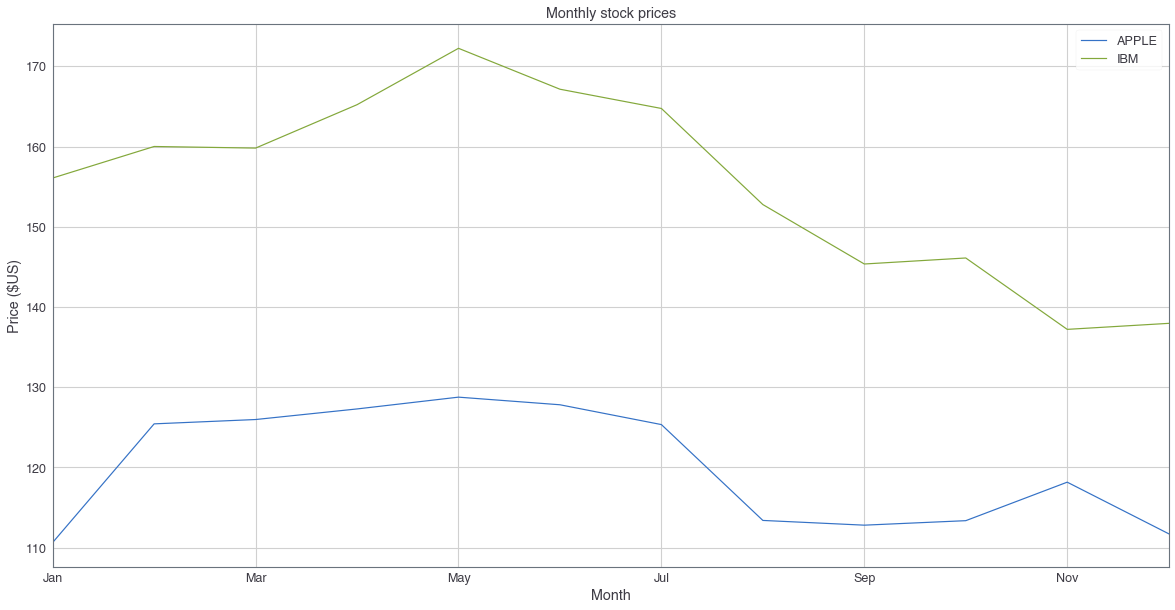

In [71]:
# Create a list of y-axis column names: y_columns
y_columns = ['APPLE', 'IBM']

# Generate a line plot
utils.stock_data.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

### pandas scatter plots

Pandas scatter plots are generated using the `kind='scatter'` keyword argument. Scatter plots require that the x and y columns be chosen by specifying the `x` and `y` parameters inside `.plot()`. Scatter plots also take an `s` keyword argument to provide the radius of each circle to plot in pixels.

In this example, we're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

The size of each circle is provided as a NumPy array called `sizes`. This array contains the normalized 'weight' of each automobile in the dataset.

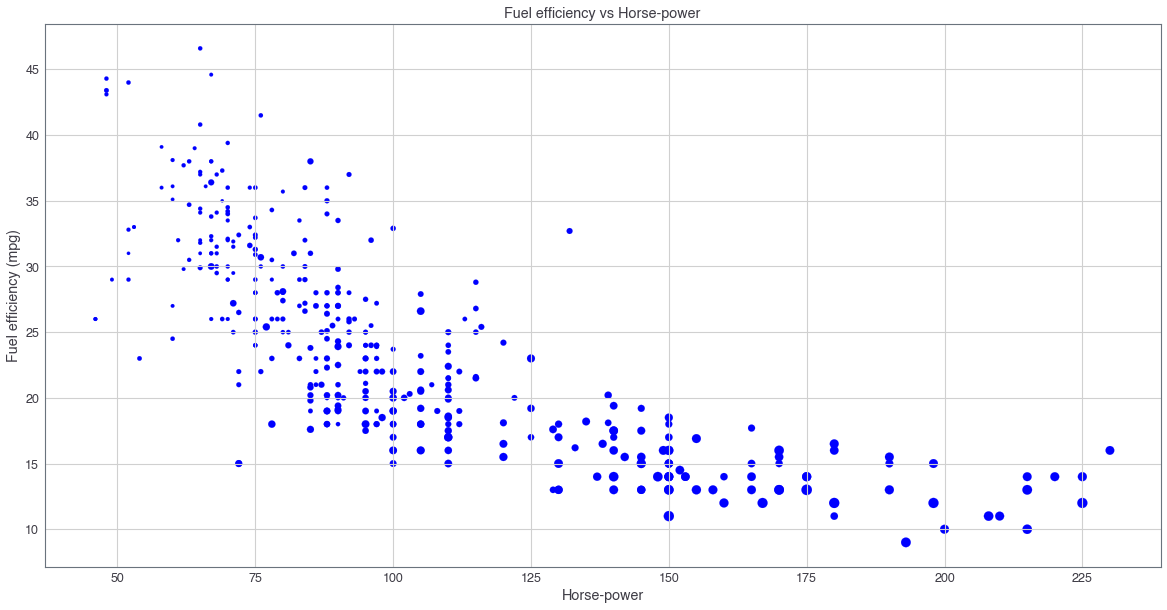

In [72]:
# Generate a scatter plot
utils.auto_mpg.plot(kind='scatter', x='hp', y='mpg', s=utils.sizes, c='blue')

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

### pandas box plots

While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The `.plot()` method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this example we will generate box plots for fuel efficiency (mpg) and weight from the automobiles data set. To do this in a single figure, we'll specify `subplots=True` inside `.plot()` to generate two separate plots.

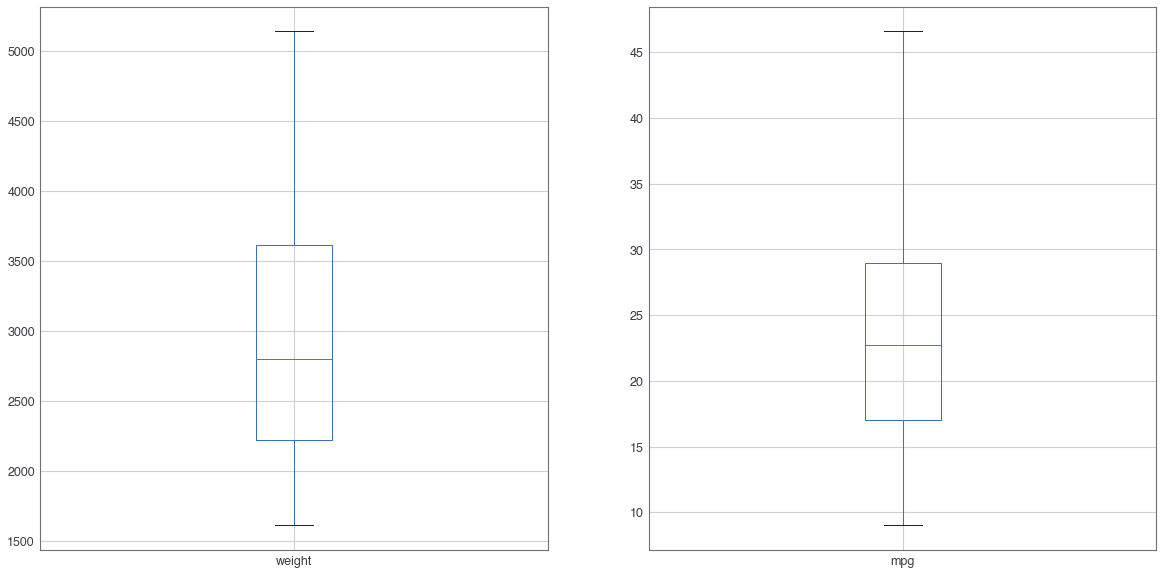

In [73]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
utils.auto_mpg[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

### pandas hist, pdf and cdf

Pandas relies on the `.hist()` method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

We will plot a PDF and CDF for the `fraction` column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

When plotting the PDF, we need to specify `normed=True` in our call to `.hist()`, and when plotting the CDF, you need to specify `cumulative=True` in addition to `density=1`.

/Users/ca68vj/miniconda3/envs/machine-learning/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


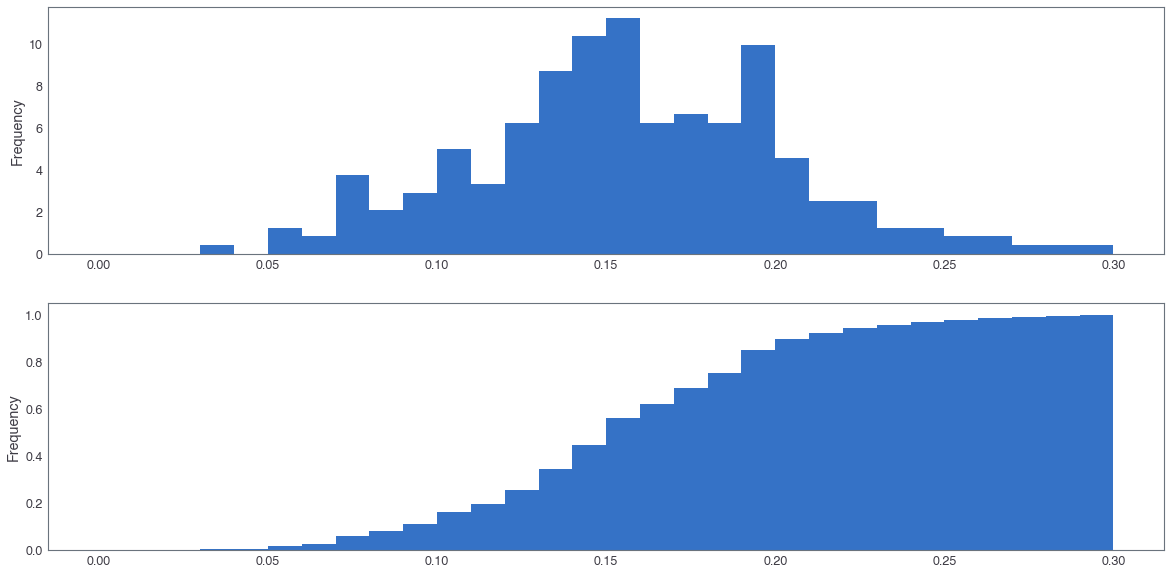

In [74]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
utils.tips.fraction.plot(ax=axes[0], kind='hist', normed=True, bins=30, range=(0,.3))
axes[0].grid(b=None)
# Plot the CDF
utils.tips.fraction.plot(ax=axes[1], kind='hist', density=1, cumulative=True, bins=30, range=(0,.3))
axes[1].grid(b=None)

# Show the plots
plt.show()

## Statistical exploratory data analysis

### Median vs mean

In many data sets, there can be large differences in the mean and median value due to the presence of outliers.

In this example, we'll investigate the mean, median, and max fare prices paid by passengers on the Titanic and generate a box plot of the fare prices. 

In [75]:
# Print summary statistics of the fare column with .describe()
utils.titanic.fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

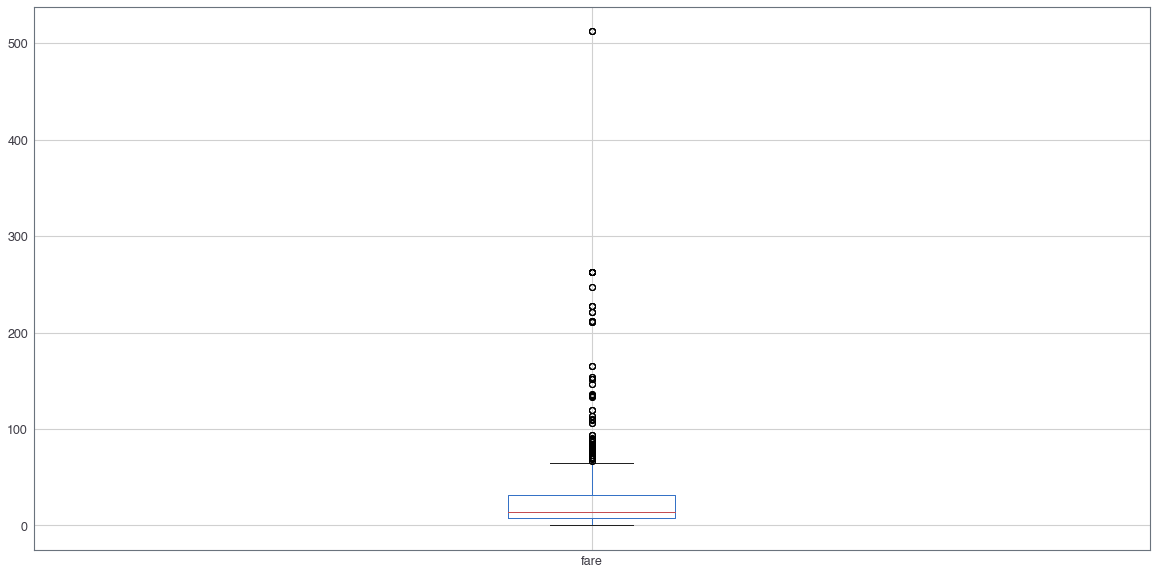

In [76]:
# Generate a box plot of the fare column
utils.titanic.fare.plot(kind='box')

# Show the plot
plt.show()

### Quantiles

In this example, we'll investigate the probabilities of life expectancy in countries around the world. This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from Gapminder.

First, we will determine the number of countries reported in 2015. There are a total of 260 unique countries in the entire dataset. Then, we will compute the 5th and 95th percentiles of life expectancy over the entire dataset. Finally, we will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.

In [77]:
# Print the number of countries reported in 2015
utils.life_expectancy['2015'].count()

208

In [78]:
# Print the 5th and 95th percentiles
utils.life_expectancy.quantile([0.05, 0.95])

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0.05,12.95,25.40,25.30,25.20,25.2,25.2,25.40,25.40,25.40,25.3,...,53.07,53.60,54.235,54.935,55.97,56.335,56.705,56.87,57.855,59.2555
0.95,246.05,37.92,37.35,38.37,38.0,38.3,38.37,38.37,38.37,38.0,...,80.73,80.93,81.200,81.365,81.60,81.665,81.830,82.00,82.100,82.1650


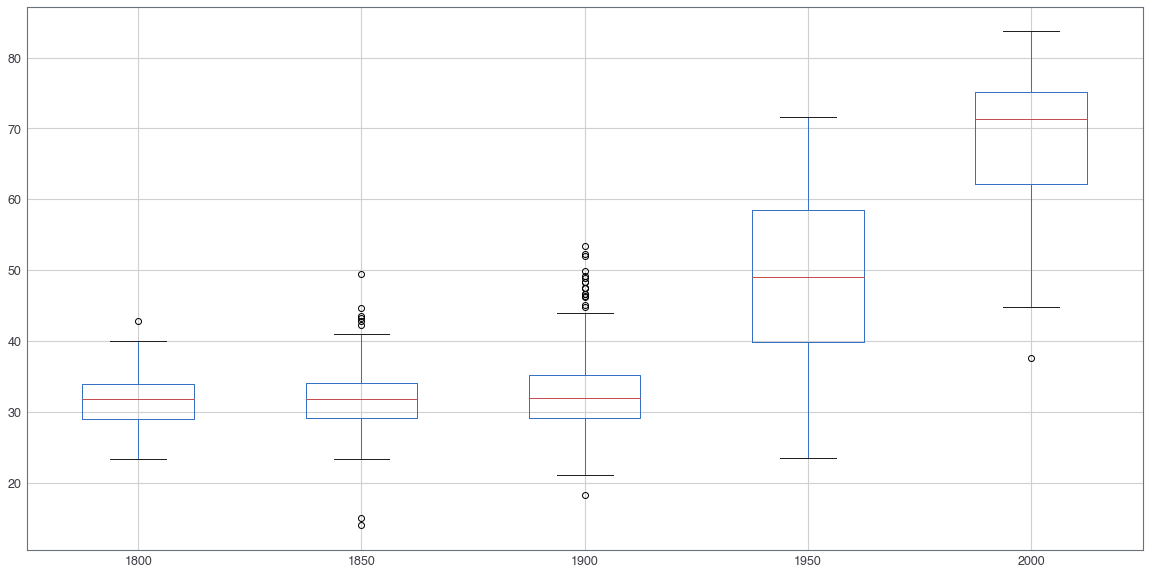

In [79]:
# Generate a box plot
years = ['1800','1850','1900','1950','2000']
utils.life_expectancy[years].plot(kind='box')
plt.show()